<a href="https://colab.research.google.com/github/itrail/CovidDataAnalyzing/blob/main/CovidDataAnalyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from collections import OrderedDict
import json
from itertools import islice
from datetime import timedelta, date, datetime, timezone
from openpyxl import load_workbook
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from numpy import mean, average
import random

In [3]:
#creating json file with excel covid19 data 

def create_json():
  covid_data = []
  #open a spreadsheet and sheet
  wb = load_workbook('covid19.xlsx')
  sheet = wb['newCases2021']

  #copy row by row with loop
  for row in islice(sheet.values, 1, sheet.max_row):
      data = OrderedDict()
      day = row[0]
      day  = day.strftime("%d.%m.%Y")
      data['date'] = day
      data['cases'] = str(row[1])
      covid_data.append(data)
  newlist = sorted(covid_data, key=lambda x: datetime.strptime(x['date'], '%d.%m.%Y'))
  j = json.dumps(newlist) 

  #save data in json file
  with open('/content/gdrive/My Drive/data.json', 'w') as f:
    f.write(j)

In [ ]:
def update_json():
  with open('/content/gdrive/My Drive/data.json', 'r') as f:
    json_object = json.load(f)
    f.close()
  #open a spreadsheet and sheet
  wb = load_workbook('covid19.xlsx')
  sheet = wb['newCases2020']

  #copy row by row with loop
  for row in islice(sheet.values, 1, sheet.max_row):
      data = OrderedDict()
      day = row[0]
      day  = day.strftime("%d.%m.%Y")
      data['date'] = day
      data['cases'] = str(row[1])
      json_object.append(data)
  newlist = sorted(json_object, key=lambda x: datetime.strptime(x['date'], '%d.%m.%Y'))
  j = json.dumps(newlist) 
  with open('/content/gdrive/My Drive/data.json', 'w') as f:
    f.write(j)

#update_json()


In [ ]:
#create_json()

In [4]:
import requests

#data actualization
covid_data=[]
#url of webpage with covid data
url = 'https://www.worldometers.info/coronavirus/country/poland/'

#get the page content
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
#find lists, here's data about new cases and deaths
data_iterator = iter(soup.find_all('li', {'class': 'news_li'}))

#delta is variable to substracting date, if its before 12 data probably hasn't been updated
now = datetime.now(timezone(timedelta(hours=2)))
if now.hour >= 11:
  delta = 0
else:
  delta = 1

#getting todays date
today = date.today()
#loop for all obtained data
with open('/content/gdrive/My Drive/data.json', 'r') as f:
  json_object = json.load(f)
  f.close()
days = []
for item in json_object:
  days.append(item['date'])
iterator = 0;
while True:
    try:
      #substracting dates
      day  = today - timedelta(days=delta)
      day  = day .strftime("%d.%m.%Y")
      #getting the next row and cleaning the info
      newData = next(data_iterator).text
      newData = newData.split(" new cases and ", 1)
      newCases = newData[0]
      newDeaths= newData[1].replace(' new deaths in Poland\xa0[source]', '')
      newCases = newCases.replace(',', '')
      data = {"date": day, "cases": newCases, }

      #saving data if is not in json file
      if data['date'] not in days:
        print(data)
        json_object.append(data)
        
      print(day  + ": " + newCases)
      delta += 1
      iterator += 1
    except StopIteration:
      break

#sorting by dates
newlist = sorted(json_object, key=lambda x: datetime.strptime(x['date'], '%d.%m.%Y'))
j = json.dumps(newlist) 
with open('/content/gdrive/My Drive/data.json', 'w') as f:
    f.write(j)

{'date': '21.06.2021', 'cases': '73'}
21.06.2021: 73
20.06.2021: 133
19.06.2021: 168
18.06.2021: 190
17.06.2021: 218
16.06.2021: 238
15.06.2021: 216


In [5]:
#print the data
with open('/content/gdrive/My Drive/data.json', 'r') as f:
  json_object = json.load(f)
  f.close()

cases = []
days = []
for item in json_object:
  print(item)
  cases.append(int(item['cases']))
  days.append(item['date'])


{'date': '27.02.2020', 'cases': '0'}
{'date': '28.02.2020', 'cases': '0'}
{'date': '29.02.2020', 'cases': '0'}
{'date': '01.03.2020', 'cases': '0'}
{'date': '02.03.2020', 'cases': '0'}
{'date': '03.03.2020', 'cases': '0'}
{'date': '04.03.2020', 'cases': '1'}
{'date': '05.03.2020', 'cases': '0'}
{'date': '06.03.2020', 'cases': '4'}
{'date': '07.03.2020', 'cases': '1'}
{'date': '08.03.2020', 'cases': '5'}
{'date': '09.03.2020', 'cases': '6'}
{'date': '10.03.2020', 'cases': '5'}
{'date': '11.03.2020', 'cases': '9'}
{'date': '12.03.2020', 'cases': '20'}
{'date': '13.03.2020', 'cases': '17'}
{'date': '14.03.2020', 'cases': '36'}
{'date': '15.03.2020', 'cases': '21'}
{'date': '16.03.2020', 'cases': '52'}
{'date': '17.03.2020', 'cases': '61'}
{'date': '18.03.2020', 'cases': '49'}
{'date': '19.03.2020', 'cases': '68'}
{'date': '20.03.2020', 'cases': '70'}
{'date': '21.03.2020', 'cases': '111'}
{'date': '22.03.2020', 'cases': '98'}
{'date': '23.03.2020', 'cases': '116'}
{'date': '24.03.2020', '

In [6]:
average = 0
for n in range(1, 8):
  i = -8 + n
  average = ((n-1)*average+ cases[i])/n
  print(str(cases[i]) + ":" + str(average))

215:215.0
238:226.5
218:223.66666666666666
190:215.25
168:205.8
133:193.66666666666666
73:176.42857142857142


In [7]:
today = date.today()
n=0
sum=0
for day in days:
  date_dt2 = datetime.strptime(day, '%d.%m.%Y')
  if date_dt2.month == today.month-1:
    n=n+1
    #print(cases[days.index(day)])
    sum=sum+cases[days.index(day)]
    
last_month_avg = sum/n
print(last_month_avg)

1470.532258064516


In [8]:
#plotting covid cases

fig = go.Figure()
fig.add_trace(go.Scatter(x=days, y=cases, name='Covid Cases', mode='markers+lines'))
fig.add_trace(go.Scatter(x=days, y=(len(json_object)+1) * [last_month_avg], name='Last month average', mode='lines'))
#fig.add_trace(go.Scatter(x=days, y=(len(json_object)+1) * [average], name='Last 7 days average', mode='lines'))
fig.add_trace(go.Scatter(x=days, y=(len(json_object)+1) * [mean(cases)], name='Todays Average', mode='lines'))
fig.update_layout(width=1300, height=500, title='Number of covid19 cases by day in 2021', xaxis_title='Days', yaxis_title='Cases')
fig.show()

In [9]:
#libraries for creating neural network
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import plotly.graph_objects as go

In [10]:
def split_sequence(seq, n_steps):
  IN = []
  OUT = []
  for i in range(len(seq)-n_steps):
    TEMP = []
    for j in range(i,n_steps):
      TEMP.append(seq[j])
    IN.append(TEMP)
    OUT.append(seq[j+1])
    n_steps=n_steps+1
  print(len(IN))
  return IN,OUT

In [11]:
#splitting the sequences of 14-days covid datasets
n = 14
X, Y = split_sequence(cases, n)
limit = 0.2*len(X)

#splitting for validation data and training data
Validation_X = []
Validation_Y = []
i=0
while(i<limit):
    r=random.randint(1,len(X))
    r=r-1
    Validation_X.append(X[r])
    Validation_Y.append(Y[r])
    del X[r], Y[r]
    i+=1

X = np.array(X)
Y = np.array(Y)
Validation_X = np.array(Validation_X)
Validation_Y = np.array(Validation_Y)

#for i in range(len(Validation_X)):
#    print(Validation_X[i], Validation_Y[i])

#print of training data set
for i in range(len(X)):
    print(X[i], Y[i])

467
[ 0  0  0  0  0  1  0  4  1  5  6  5  9 20] 17
[ 0  0  0  1  0  4  1  5  6  5  9 20 17 36] 21
[ 0  0  1  0  4  1  5  6  5  9 20 17 36 21] 52
[ 0  1  0  4  1  5  6  5  9 20 17 36 21 52] 61
[ 0  4  1  5  6  5  9 20 17 36 21 52 61 49] 68
[ 4  1  5  6  5  9 20 17 36 21 52 61 49 68] 70
[ 1  5  6  5  9 20 17 36 21 52 61 49 68 70] 111
[  5   6   5   9  20  17  36  21  52  61  49  68  70 111] 98
[  6   5   9  20  17  36  21  52  61  49  68  70 111  98] 116
[  5   9  20  17  36  21  52  61  49  68  70 111  98 116] 152
[ 20  17  36  21  52  61  49  68  70 111  98 116 152 150] 170
[ 17  36  21  52  61  49  68  70 111  98 116 152 150 170] 168
[ 52  61  49  68  70 111  98 116 152 150 170 168 249 224] 193
[ 61  49  68  70 111  98 116 152 150 170 168 249 224 193] 256
[ 49  68  70 111  98 116 152 150 170 168 249 224 193 256] 243
[ 68  70 111  98 116 152 150 170 168 249 224 193 256 243] 392
[111  98 116 152 150 170 168 249 224 193 256 243 392 437] 244
[116 152 150 170 168 249 224 193 256 243 392 43

In [12]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
Validation_X = Validation_X.reshape((Validation_X.shape[0], Validation_X.shape[1], n_features))
Y = Y.reshape((Y.shape[0], 1, n_features))
Validation_Y = Validation_Y.reshape((Validation_Y.shape[0], 1, n_features))
look_back = n

In [ ]:
X.shape

(372, 14, 1)

In [13]:
#creating the model
from keras.models import Sequential
from keras.layers import LSTM, Dense


model = Sequential()
model.add(
    LSTM(50,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='RMSprop', loss='mae')

num_epochs = 10000

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X, Y, epochs=num_epochs, validation_data=(X,Y), verbose=1)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Epoch 7501/10000
12/12 [==============================] - 1s 51ms/step - loss: 624.7082 - val_loss: 577.6144
Epoch 7502/10000
12/12 [==============================] - 1s 60ms/step - loss: 589.1257 - val_loss: 604.8022
Epoch 7503/10000
12/12 [==============================] - 1s 63ms/step - loss: 631.6767 - val_loss: 547.1340
Epoch 7504/10000
12/12 [==============================] - 1s 56ms/step - loss: 504.3245 - val_loss: 553.8243
Epoch 7505/10000
12/12 [==============================] - 1s 52ms/step - loss: 494.7115 - val_loss: 525.6287
Epoch 7506/10000
12/12 [==============================] - 1s 55ms/step - loss: 520.3600 - val_loss: 535.6426
Epoch 7507/10000
12/12 [==============================] - 1s 62ms/step - loss: 549.5137 - val_loss: 519.3140
Epoch 7508/10000
12/12 [==============================] - 1s 59ms/step - loss: 507.5603 - val_loss: 513.1385
Epoch 7509/10000
12/12 [==============================] - 1s 60

Text(0.5, 0, 'epoch')

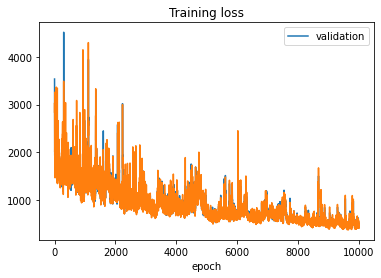

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training'])
plt.legend(['validation'])
plt.title('Training loss')
plt.xlabel('epoch')

In [17]:
print(min(history.history['val_loss']))
print(history.history['val_loss'].index(min(history.history['val_loss'])))
print()
print(min(history.history['loss']))
print(history.history['loss'].index(min(history.history['loss'])))

378.510009765625
9652

399.906494140625
9653


In [18]:
#saving a model

model.save("covid_prediction.h5")
!cp "covid_prediction.h5" "/content/gdrive/My Drive/"

In [ ]:
#loading a model
from keras.models import load_model

model = load_model("/content/gdrive/My Drive/covid_prediction.h5")

In [39]:
#next day covid cases prediction
def predict_next_day(test_data):
  test_data = test_data.reshape((1, 14, n_features))
  return int(np.round(model.predict(test_data, verbose=1)))

Test_X, Test_Y = split_sequence(cases, n)
Test_X = np.array(Test_X)
Test_Y = np.array(Test_Y)
Test_Y = Test_Y.reshape((Test_Y.shape[0], 1, n_features))
Test_X = Test_X.reshape((Test_X.shape[0], Test_X.shape[1], n_features))
Test_Y = Test_Y.reshape((Test_Y.shape[0], 1, n_features))
test_prediction = model.predict(Test_X)
input = np.array(cases[-14:])
for i in range(0,30):
  input = np.append(input, predict_next_day(input[-14:]))


close_test = Test_Y.reshape((-1))
test_prediction = test_prediction.reshape((-1))

absolute_errors = np.abs(np.subtract(close_test, test_prediction))
relative_errors = np.divide(absolute_errors, close_test) * 100


trace2 = go.Scatter(
    x = [i for i in range (0, len(Test_X))],
    y = test_prediction,
    name = 'Test Prediction',
    mode='lines',
    line=dict(width=4, color='Green')
)
trace3 = go.Scatter(
    x = [i for i in range (0, len(Test_X))],
    y = close_test,
    mode='markers+lines',
    name = 'Acquired Data'
)
trace1 = go.Scatter(
    x = [i for i in range (len(Test_X)+1, len(Test_X)+1+len(input[14:]))],
    y = input[14:],
    name = 'Prediction',
    mode='lines',
    line=dict(width=4, color='Blue')
)
layout = go.Layout(
    title = "Covid Cases",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Cases"}
)
fig = go.Figure(data=[trace2, trace3, trace1], layout=layout)
fig.show()

467
1/1 [==============================] - 0s 20ms/step


In [28]:
len(X)

373

In [29]:
Test_Y[0]

array([[20]])

In [31]:
# The median of absolute errors
print("Mediana błedu bezwzględnego wynosi: " + str(np.median(absolute_errors)))
print("Najwieksza pomyłka wynosi blisko: "+ str(int(np.ceil(max(relative_errors)))) + " % i jest dla argumentu o wartości: " + str(Test_Y[np.argmax(relative_errors)]))

Mediana błedu bezwzględnego wynosi: 148.2265625
Najwieksza pomyłka wynosi blisko: 113 % i jest dla argumentu o wartości: [[15356]]


In [32]:
np.argmax(relative_errors)

258

In [33]:
# Relative errors [%]
np.round(relative_errors, 2)

array([4.3790e+01, 9.2000e-01, 5.1200e+01, 2.5200e+00, 6.5630e+01,
       7.8000e-01, 2.9930e+01, 1.2500e+00, 5.1700e+00, 1.5400e+00,
       4.1100e+00, 4.0700e+00, 4.8500e+00, 8.3900e+00, 2.3120e+01,
       4.9000e+00, 3.2720e+01, 1.3460e+01, 2.5280e+01, 1.8400e+01,
       1.1840e+01, 3.6030e+01, 5.3400e+00, 8.9330e+01, 6.2570e+01,
       2.6370e+01, 3.2970e+01, 2.1250e+01, 4.2100e+00, 1.4300e+01,
       3.6000e+00, 3.3290e+01, 3.2530e+01, 5.4200e+00, 3.2640e+01,
       6.2700e+00, 4.3030e+01, 1.6710e+01, 3.8470e+01, 3.9420e+01,
       2.0330e+01, 8.0700e+00, 1.6500e+01, 1.0760e+01, 4.4200e+00,
       7.3000e+00, 2.1000e+00, 2.5780e+01, 8.7300e+00, 3.6120e+01,
       3.8650e+01, 1.3420e+01, 2.0040e+01, 6.9100e+00, 3.0550e+01,
       2.0830e+01, 3.7300e+00, 1.4420e+01, 1.5850e+01, 1.4090e+01,
       9.2300e+00, 4.1680e+01, 5.3260e+01, 1.7930e+01, 3.2410e+01,
       6.8720e+01, 1.8230e+01, 8.7700e+00, 8.9500e+00, 2.5240e+01,
       8.3300e+00, 1.0920e+01, 3.5450e+01, 1.2540e+01, 4.8500e

In [34]:
next_day = predict_next_day(np.array(cases[-14:]))
print(next_day)
print("Przewidywany margines błędu: [" + str(np.round(next_day - np.median((relative_errors/100)*next_day))) + " ; " +  str(np.round(next_day + np.median((relative_errors/100)*next_day))) + "]")

1/1 [==============================] - 0s 18ms/step
97
Przewidywany margines błędu: [87.0 ; 107.0]


In [ ]:
np.array(cases[-15:])

array([317, 415, 310, 195, 532, 428, 382, 341, 238, 226, 140, 215, 238,
       218, 190])

In [ ]:
np.median(absolute_errors)

228.40553283691406

In [ ]:
#coefficient of variance
np.std(cases)/np.mean(cases) * 100 

133.6160118760004

In [ ]:
len(prediction)

464

In [ ]:
len(close_test)

464